# Exercise1

## Task1

Exponential model of growth of an organism is dN/dt rN where N(t) is the population at time t and r > 0 is the growth rate.

To overcome the ideas of overcrowding and limited resources in the exponential growth model logistic equation is used. 

One dimensional logistic equation is:

dN/dt = r*N*(1-N/K) where N(t) is the population at time t, r > 0 is the growth rate and K is the carrying capacity

### Part 1

Solve the above equation analytically and plot the result in a time series manner.

#### Solution

Note: For simplicity N(t) is written as N

Analytical Solution of the given equation is given by applying the following steps

$\frac{dN}{dt} = r \times {N \times (1-\frac{N}{K})}$

Separate the variables N and t 

$\frac{dN}{N(1-\frac{N}{K})} = r \times dt$

Partial decomposition of terms in LHS gives us 

$\frac{1}{N(1-\frac{N}{K})} = \frac{k}{N \times (K-N)} = \frac{1}{N} + \frac{1}{K-N}$

The new equation is 

$\frac{dN}{N} + \frac{dN}{K-N} = r \times dt$

$\int \frac{dN}{N} + \frac{dN}{K-N} = \int r \times dt$

$\ln{|N|} - \ln{|K-N|} = rt + C$

$\ln{\frac{|K-N|}{|N|}} = -rt - C$

$\frac{|K-N|}{|N|} = e^{-rt - C}$

$\frac{K-N}{N} = A \times e^{-rt}$

$N = \frac{K}{1 - A \times e^{-rt}}$ where $A = \frac{K - No}{No}$



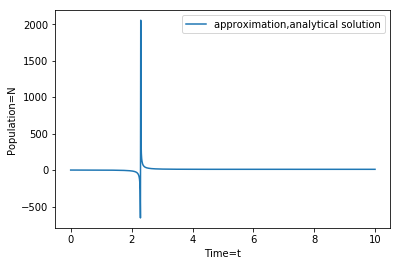

In [10]:
#Solve the equation analytically and plot the result in a time series manner
import numpy as np
import matplotlib.pyplot as plt
import math
#Time steps: an array of values starting from 0 going up to 10, in step size of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
A = (K-No)/No
N = K/(1-(A*np.exp(-1*r*t)))
# t is an array, it is the same as doing it for each element
plt.plot(t,N)
plt.legend(['approximation,analytical solution'], loc='best') # draw legend
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()





In [ ]:
# import the numerical integrator we will use, odeint()
from scipy.integrate import odeint



# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (N) and of the 
# time (t), even if time does not appear explicitly

def f(N, t, r, K):
    return r*N*(1-N/K)

# call the function that performs the integration
# the order of the arguments is as below: the derivative function,
# the initial condition, the points where we want the solution, and
# a list of parameters
N = odeint(f, N0, t, (r, K))

# plot the solution
plt.plot(t, N)
xlabel('Time=t') # define label of x-axis
ylabel('Population=N') # and of y-axis
plt.show()
